# Extract skewers from snapshot

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120
import extract_skewers
import read_gadget
import fake_spectra.griddedspectra as grid_spec

### Start with a single snapshot, get skewers and compute mean flux

In [2]:
basedir='/Users/font/CosmoData/test_sim_emulator/test_march_2019/'
outdir=basedir+'/output/skewers/'
test_snap_num=8
n_skewers=10
width_kms=10
skewers=extract_skewers.get_skewers_snapshot(basedir,outdir,test_snap_num,n_skewers=n_skewers,width_kms=width_kms)
print('<F> =',skewers.get_mean_flux())
skewers.save_file()

Reloading from snapshot (will save to:  /Users/font/CosmoData/test_sim_emulator/test_march_2019//output/skewers/skewers_8_10_10.hdf5  )
100  sightlines. resolution:  10  z= 3.500000045
<F> = 0.454321588564
No temperature data to save


### Read skewers from file and compute mean flux

In [3]:
sim_directory=basedir+'output/'
spectra_name="skewers_"+str(test_snap_num)+"_"+str(n_skewers)+"_"+str(width_kms)+'.hdf5'
skewers_from_file = grid_spec.GriddedSpectra(test_snap_num,sim_directory,
                savefile=spectra_name,savedir=outdir,reload_file=False)
print('<F> =',skewers.get_mean_flux())

Save file has no temperature data saved!
100  sightlines. resolution:  10.0221065884  z= 3.500000045
<F> = 0.454321588564


### Loop over all snapshots and plot $<F>(z)$


In [4]:
paramfile=basedir+'paramfile.gadget'
zs=read_gadget.redshifts_from_paramfile(paramfile)
Nsnap=len(zs)

In [5]:
zmax=6.0
mf_val=[]
mf_zs=[]
mf_snaps=[]
for num in range(Nsnap):
    z=zs[num]
    if z < zmax:
        skewers=extract_skewers.get_skewers_snapshot(basedir,outdir,num,n_skewers=n_skewers,width_kms=width_kms)
        mf=skewers.get_mean_flux()
        mf_val.append(mf)
        mf_zs.append(z)
        mf_snaps.append(num)
        skewers.save_file()       

Reloading from snapshot (will save to:  /Users/font/CosmoData/test_sim_emulator/test_march_2019//output/skewers/skewers_2_10_10.hdf5  )
100  sightlines. resolution:  10  z= 4.99999988
No temperature data to save
Reloading from snapshot (will save to:  /Users/font/CosmoData/test_sim_emulator/test_march_2019//output/skewers/skewers_3_10_10.hdf5  )
100  sightlines. resolution:  10  z= 4.750000115
No temperature data to save
Reloading from snapshot (will save to:  /Users/font/CosmoData/test_sim_emulator/test_march_2019//output/skewers/skewers_4_10_10.hdf5  )
100  sightlines. resolution:  10  z= 4.500000055
No temperature data to save
Reloading from snapshot (will save to:  /Users/font/CosmoData/test_sim_emulator/test_march_2019//output/skewers/skewers_5_10_10.hdf5  )
100  sightlines. resolution:  10  z= 4.25000001313
No temperature data to save
Reloading from snapshot (will save to:  /Users/font/CosmoData/test_sim_emulator/test_march_2019//output/skewers/skewers_6_10_10.hdf5  )
100  sightl

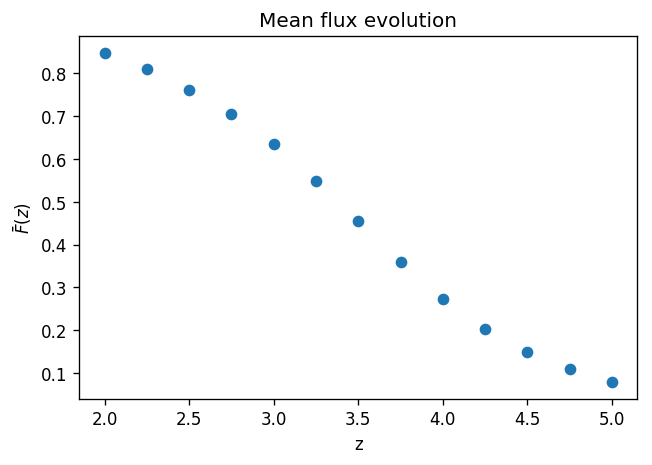

In [6]:
plt.plot(np.array(mf_zs),np.array(mf_val),'o')
plt.xlabel('z')
plt.ylabel(r'$\bar F(z)$')
plt.title('Mean flux evolution')